# PA6 practice for OPPE2  

`All the answers are wrong!`

In [6]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [1]:
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1)
type(data)

sklearn.utils.Bunch

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = data.data.to_numpy()
y = data.target.to_numpy()

X.shape, y.shape

((70000, 784), (70000,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49000, 784), (21000, 784), (49000,), (21000,))

In [8]:
y_train[-1]

'0'

In [23]:
# Function to pick required digits
def pick(X, y, digit):
    i = np.where(y == str(digit))
    return X[i], y[i]

In [10]:
# i6 = np.where(y_train == '6')
# i9 = np.where(y_train == '9')

# x6 = X_train[i6]
# x9 = X_train[i9]

# y6 = y_train[i6]
# y9 = y_train[i9]

# x6.shape, x9.shape, y6.shape, y9.shape

((4788, 784), (4868, 784), (4788,), (4868,))

In [24]:
# prepare training data
x6, y6 = pick(X_train, y_train, 6)
x9, y9 = pick(X_train, y_train, 9)
x6.shape, x9.shape, y6.shape, y9.shape

((4788, 784), (4868, 784), (4788,), (4868,))

In [22]:
x69_stack = np.concatenate((x6, x9), axis=0)
y69_stack = np.concatenate((y6, y9), axis=0)
x69_stack.shape, y69_stack.shape

((9656, 784), (9656,))

In [25]:
# relabel 
y69_new = np.where(y69_stack == '6', 1, 0)
y69_new

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
from sklearn.utils import shuffle
x69_shuffled = shuffle(x69_stack, random_state=1729)
y69_shuffled = shuffle(y69_stack, random_state=1729)

In [27]:
# prepare test data
x6_test, y6_test = pick(X_test, y_test, 6)
x9_test, y9_test = pick(X_test, y_test, 9)
x69_stack_test = np.concatenate((x6_test, x9_test), axis=0)
y69_stack_test = np.concatenate((y6_test, y9_test), axis=0)

In [29]:
# relabel
y69_test_new = np.where(y69_stack_test=='6', 1, 0)
y69_test_new

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
np.sum(y69_stack.astype(int))

72540

In [34]:
np.sum(y69_stack_test.astype(int))

31338

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x69_tf = ss.fit_transform(x69_stack)

In [43]:
x69_tf.shape

(9656, 784)

In [45]:
x69_tf[0, :].shape

(784,)

In [47]:
x69_tf[0].mean(), x69_tf[0].std()

(0.11681636987110701, 1.1416511440001913)

In [49]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=10, random_state=10, penalty=None, warm_start=True)
# sgdc.fit(x69_shuffled, y69_new)

In [76]:
from sklearn.model_selection import learning_curve
import seaborn as sns

def plot(X, y, alpha, iter=10, inv=False):
    sgdc = SGDClassifier(alpha = alpha, max_iter=10, random_state=10, penalty=None, warm_start=True)
    if inv:
        power_t = 1
        sgdc = SGDClassifier(max_iter=10, random_state=10, penalty=None, learning_rate='invscaling', eta0=1, power_t = power_t, warm_start=True)
    iterations = list(range(10))
    loss = []
    sgdc.partial_fit(X, y, classes=[1,0])
    for _ in range(iter):
        sgdc.partial_fit(X, y)
        loss.append(sgdc.score(X, y))
    print(sns.lineplot(iterations, loss))

AxesSubplot(0.125,0.125;0.775x0.755)


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


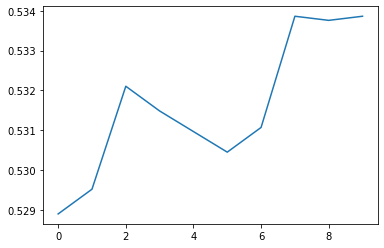

In [66]:
plot(x69_shuffled, y69_new, 0.01)

AxesSubplot(0.125,0.125;0.775x0.755)


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


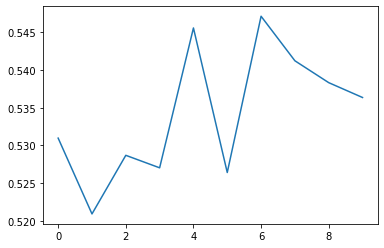

In [67]:
plot(x69_shuffled, y69_new, 0.000001)

AxesSubplot(0.125,0.125;0.775x0.755)


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


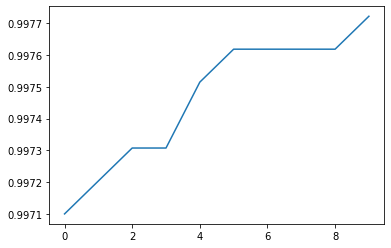

In [68]:
plot(x69_tf, y69_new, 0.01)


AxesSubplot(0.125,0.125;0.775x0.755)


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


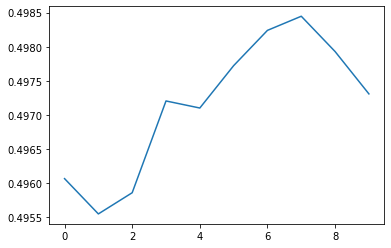

In [77]:
plot(x69_shuffled, y69_new, 0.01, inv=True)

In [73]:
?sgdc

Type:        SGDClassifier
String form: SGDClassifier(max_iter=10, penalty=None, random_state=10)
File:        c:\programdata\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py
Docstring:  
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays
of floating point values for the features. The model it fits can be
controlled with the loss parameter; by default, it fits a linear support
vector machine (SVM).

The regularizer is a p